In [ ]:
# Computer Vision Image analysis

In [ ]:
import requests

from io import BytesIO

from PIL import Image

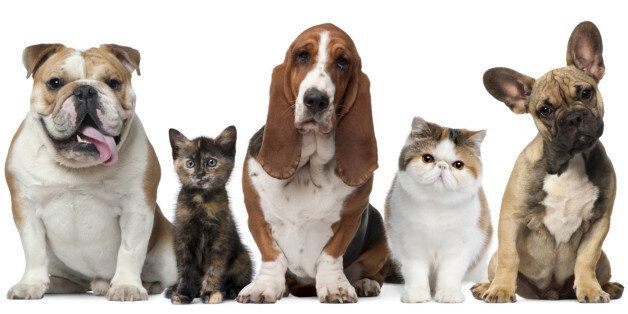

In [ ]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/23030_44978.jpeg' 

# 'https://image.kmib.co.kr/online_image/2020/1122/611718110015239102_4.jpg'
image = Image.open(BytesIO(requests.get(image_url).content))

# response = requests.get(image_url)

# img = BytesIO(response.content)
# image = Image.open(img)

image

In [ ]:
# 필요한 값들을 준비한다.

key = '1577f1c3435346afbf967d54fc43aa88'
endpoint = 'https://labuser119computervision2.cognitiveservices.azure.com/' + 'vision/v3.0/'

In [ ]:
analyze_endpoint = endpoint + 'analyze'
detect_entpoint = endpoint + 'detect'

In [ ]:
header = {'Ocp-Apim-Subscription-Key':key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [ ]:
response = requests.post(analyze_endpoint, 
              headers=header,
              params=params,
              json=data)

In [ ]:
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '8B5D40',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'sitting',
   'indoor',
   'brown',
   'animal',
   'small',
   'front',
   'standing',
   'looking',
   'table',
   'different',
   'cat',
   'playing'],
  'captions': [{'text': 'a brown and white dog',
    'confidence': 0.8394569345373887}]},
 'requestId': 'fae59af5-5d92-4c3a-a275-a33562cef948',
 'metadata': {'height': 314, 'width': 628, 'format': 'Jpeg'}}

In [ ]:
result['description']['captions'][0]['text']

'a brown and white dog'

In [ ]:
# Object Detection

headers = {'Ocp-Apim-Subscription-Key': key}
params = {}
data = {'url':image_url}

In [ ]:
response = requests.post(detect_entpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 161, 'y': 124, 'w': 90, 'h': 178},
   'object': 'dog',
   'confidence': 0.74,
   'parent': {'object': 'mammal',
    'confidence': 0.838,
    'parent': {'object': 'animal', 'confidence': 0.838}}},
  {'rectangle': {'x': 384, 'y': 111, 'w': 109, 'h': 192},
   'object': 'cat',
   'confidence': 0.696,
   'parent': {'object': 'mammal',
    'confidence': 0.884,
    'parent': {'object': 'animal', 'confidence': 0.884}}},
  {'rectangle': {'x': 3, 'y': 40, 'w': 166, 'h': 264},
   'object': 'dog',
   'confidence': 0.894,
   'parent': {'object': 'mammal',
    'confidence': 0.913,
    'parent': {'object': 'animal', 'confidence': 0.913}}},
  {'rectangle': {'x': 234, 'y': 28, 'w': 154, 'h': 283},
   'object': 'basset hound',
   'confidence': 0.575,
   'parent': {'object': 'hound',
    'confidence': 0.795,
    'parent': {'object': 'dog',
     'confidence': 0.843,
     'parent': {'object': 'mammal',
      'confidence': 0.861,
      'parent': {'object': 'animal', 'confide

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [ ]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y), objectName, fill='green')

In [ ]:
MakeBox(result)

{'x': 161, 'y': 124, 'w': 90, 'h': 178}
{'x': 384, 'y': 111, 'w': 109, 'h': 192}
{'x': 3, 'y': 40, 'w': 166, 'h': 264}
{'x': 234, 'y': 28, 'w': 154, 'h': 283}
{'x': 478, 'y': 28, 'w': 146, 'h': 286}
{'x': 5, 'y': 33, 'w': 411, 'h': 269}
{'x': 212, 'y': 26, 'w': 410, 'h': 288}


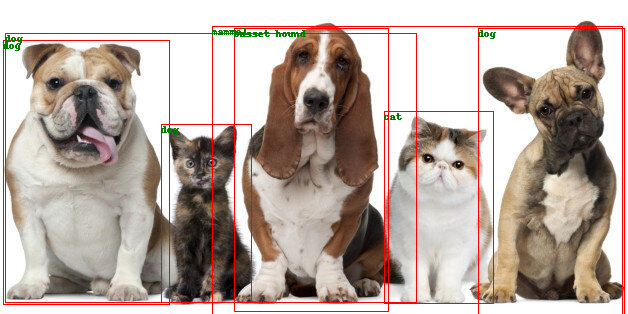

In [ ]:
image

In [ ]:
ocr_endpoint = endpoint + 'ocr'

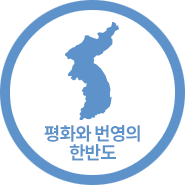

In [ ]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

image = Image.open(BytesIO(requests.get(image_url).content))

image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key':key}
params = {'language':'ko','detechtOrientation':'true'} #unk : 난 모르겠다 니가 알아서 해봐라는 뜻 / auto detect가 된다.
data = {'url': image_url}

In [ ]:
response = requests.post(ocr_endpoint,
                         headers=headers,
                         params=params,
                         json=data)

result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [ ]:
result['regions']

[{'boundingBox': '45,125,95,36',
  'lines': [{'boundingBox': '45,125,95,17',
    'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
     {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
   {'boundingBox': '70,144,46,17',
    'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]

In [ ]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word['text'])

평화와
번영의
한반도
